In [11]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import tree
import matplotlib.pyplot as plt

### Membaca File Iris.csv dan di konversi kedalam DataFrame

In [2]:
df = pd.read_csv("datasets/Iris.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


### Mendapatkan data setiap jenis iris untuk diubah kedalam bentuk numerik agar dapat dijadikan label  

In [3]:
Species = list(df['Species'].unique())
Species

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

#### menyimpan data column lain selain column Species kedalam variable X untuk dijadikan sebagai data fitur dari label yang merupakan column species pada variable y

In [4]:
X = df
X = X.drop(['Species'], axis=1)
y = df['Species']
display(X, y)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2
...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3
146,147,6.3,2.5,5.0,1.9
147,148,6.5,3.0,5.2,2.0
148,149,6.2,3.4,5.4,2.3


0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

#### Melakukan perubahan nilai dari column Species dimana setiap jenis iris di gantikan dengan nilai numerik mulai dari 0 - n sesuai dengan banyaknya jenis iris

In [5]:
y = y.replace(Species, list(range(len(Species))))
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64

#### Pembagian proporsi dataset untuk training sebesar 80% dan testing sebesar 20% dari total jumlah keseluruhan data

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    random_state=42
)

#### Membuat model Random Forest dengan hyperparameter n_estimators sebanyak 100 dimana random forest akan membuat 100 decision tree dengan setiap dataset pada masing decision tree akan ada 42 data yang diubah posisi index dari row nya  

In [13]:
# Membuat model random forest dengan 100 pohon keputusan
model = RandomForestClassifier(n_estimators=100,random_state=42)

### melakukan tahap training menggunakan dataset iris 

In [14]:
# Melatih model dengan data latih
model = model.fit(X_train, y_train)

#### Mendapatkan data hasil pembuatan decision tree yang disimpan dalam bentuk list pada atribut estimators_

In [15]:
model.estimators_

[DecisionTreeClassifier(max_features='auto', random_state=1608637542),
 DecisionTreeClassifier(max_features='auto', random_state=1273642419),
 DecisionTreeClassifier(max_features='auto', random_state=1935803228),
 DecisionTreeClassifier(max_features='auto', random_state=787846414),
 DecisionTreeClassifier(max_features='auto', random_state=996406378),
 DecisionTreeClassifier(max_features='auto', random_state=1201263687),
 DecisionTreeClassifier(max_features='auto', random_state=423734972),
 DecisionTreeClassifier(max_features='auto', random_state=415968276),
 DecisionTreeClassifier(max_features='auto', random_state=670094950),
 DecisionTreeClassifier(max_features='auto', random_state=1914837113),
 DecisionTreeClassifier(max_features='auto', random_state=669991378),
 DecisionTreeClassifier(max_features='auto', random_state=429389014),
 DecisionTreeClassifier(max_features='auto', random_state=249467210),
 DecisionTreeClassifier(max_features='auto', random_state=1972458954),
 DecisionTreeC

### Visualize All the decision tree created by random forest based on n_estimators

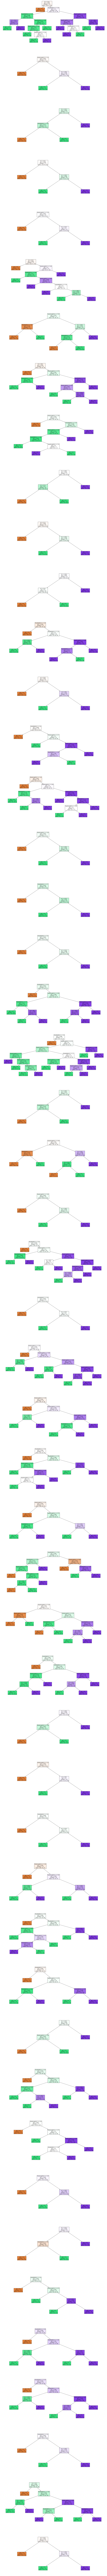

In [32]:
fig, ax = plt.subplots(50, 1, figsize=(24, 600))
for index in range(50):
    _ = tree.plot_tree(
        model.estimators_[index], 
        feature_names=X.columns, 
        filled=True, 
        fontsize = 12, 
        ax=ax[index]
    )

In [35]:
# Memprediksi label data uji
y_pred = model.predict(X_test)

# Menghitung akurasi model
akurasi = accuracy_score(y_test, y_pred)
print("Akurasi model adalah:", akurasi)

Akurasi model adalah: 1.0


In [36]:
result = X_test
result['prediction'] = y_pred

In [37]:
result

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,prediction
73,74,6.1,2.8,4.7,1.2,1
18,19,5.7,3.8,1.7,0.3,0
118,119,7.7,2.6,6.9,2.3,2
78,79,6.0,2.9,4.5,1.5,1
76,77,6.8,2.8,4.8,1.4,1
31,32,5.4,3.4,1.5,0.4,0
64,65,5.6,2.9,3.6,1.3,1
141,142,6.9,3.1,5.1,2.3,2
68,69,6.2,2.2,4.5,1.5,1
82,83,5.8,2.7,3.9,1.2,1
